# HackinSAS 2021

__Module:__ Deep Learning for sound classification incluidng LSTM & CNN
    
__Author:__ Amir Hossini

__Date:__ March 6, 2021

#### Libraries

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import random
import pickle
import librosa
from scipy import signal
import IPython.display as ipd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import *
from keras.models import *
from keras.callbacks import *
from keras import backend
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import GridSearchCV as GSCV
from sklearn import metrics
from sklearn.metrics import f1_score

sys.path.append('./src/')
from udfs_ml import conv1d, lstm
from udfs_ml import log_specgram, freeze_layers, extract_spectrogram_features
from udfs_ml import chunk_data

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

#### Import Training & Testing Sets

In [2]:
inpkl_X_train = '../data/X_train.pkl'
inpkl_X_test  = '../data/X_test.pkl'
inpkl_y_train = '../data/y_train.pkl'
inpkl_y_test  = '../data/y_test.pkl'

in_validation = '../data/validation.wav'

In [3]:
r_sample = 16000

In [4]:
X_train = pickle.load(open(inpkl_X_train,'rb'))
X_test  = pickle.load(open(inpkl_X_test,'rb'))
y_train = pickle.load(open(inpkl_y_train,'rb'))
y_test  = pickle.load(open(inpkl_y_test,'rb'))

In [5]:
sample_chunk=2

X_train_listen = X_train.reshape(len(X_train),-1)
X_test_listen  = X_test.reshape(len(X_test),-1)

ipd.Audio(X_train_listen[sample_chunk],rate=r_sample)
ipd.Audio(X_test_listen[sample_chunk],rate=r_sample)

### Model 1: CNN with time-series data
__Library:__ Keras <br>
__Model:__   Convolutional Neural Networks (CNN) with 1D layers, filters <br>
__Data:__    Time-series data (audio chunks) <br>
__Hyperparameters:__ Conv Layers, Conv Filters, Conv Kernel Sizes, Dense Layers

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline

In [7]:
hypm_cnn_ts = {'conv_layers':[2,3],
               'ls_conv_filters':[[8,16,24],[10,20,30]],
               'ls_conv_kernels':[[13,11,8],[15,15,15]],
               'ls_dense_neurns':[[16],[32]]}

n_sc = 10 # number of random scenarios in addition to the Baseline    

__Hyperparameter tunning__

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80000, 1)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 80000, 8)          112       
_________________________________________________________________
dropout (Dropout)            (None, 80000, 8)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 40000, 8)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 40000, 16)         1424      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40000, 16)         0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 20000, 16)         0     

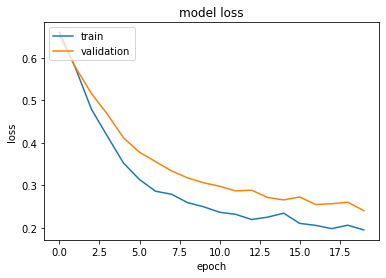

17/17 [==============================] - 1s 72ms/step - loss: 0.2545 - acc: 0.9257

Model CNN with TS #0, Accuracy (hold-out): 0.9256505370140076 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80000, 1)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 80000, 10)         160       
_________________________________________________________________
dropout (Dropout)            (None, 80000, 10)         0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 40000, 10)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 40000, 20)         3020      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40000

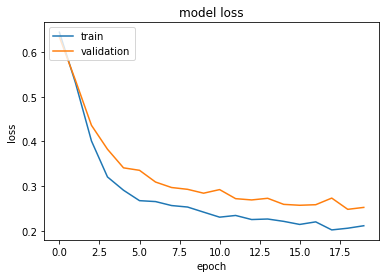

17/17 [==============================] - 2s 107ms/step - loss: 0.2485 - acc: 0.9164

Model CNN with TS #1, Accuracy (hold-out): 0.9163568615913391 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80000, 1)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 80000, 8)          128       
_________________________________________________________________
dropout (Dropout)            (None, 80000, 8)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 40000, 8)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 40000, 16)         1936      
_________________________________________________________________
dropout_1 (Dropout)          (None, 4000

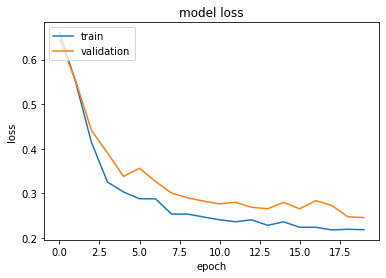

17/17 [==============================] - 1s 77ms/step - loss: 0.2454 - acc: 0.9275

Model CNN with TS #2, Accuracy (hold-out): 0.9275093078613281 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80000, 1)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 80000, 10)         160       
_________________________________________________________________
dropout (Dropout)            (None, 80000, 10)         0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 40000, 10)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 40000, 20)         3020      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40000

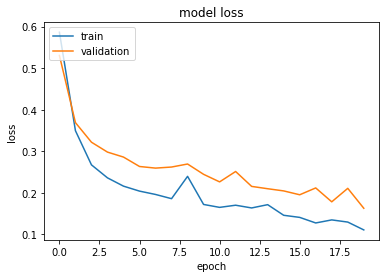

17/17 [==============================] - 2s 142ms/step - loss: 0.1786 - acc: 0.9628

Model CNN with TS #3, Accuracy (hold-out): 0.9628252983093262 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80000, 1)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 80000, 10)         160       
_________________________________________________________________
dropout (Dropout)            (None, 80000, 10)         0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 40000, 10)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 40000, 20)         3020      
_________________________________________________________________
dropout_1 (Dropout)          (None, 4000

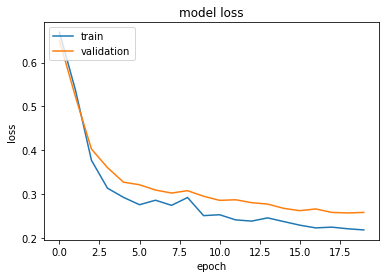

17/17 [==============================] - 2s 108ms/step - loss: 0.2666 - acc: 0.9219

Model CNN with TS #4, Accuracy (hold-out): 0.921933114528656 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80000, 1)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 80000, 10)         140       
_________________________________________________________________
dropout (Dropout)            (None, 80000, 10)         0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 40000, 10)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 40000, 20)         2220      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40000

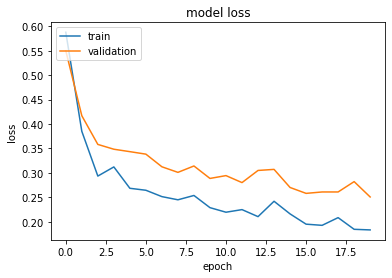

17/17 [==============================] - 2s 123ms/step - loss: 0.2507 - acc: 0.9480

Model CNN with TS #5, Accuracy (hold-out): 0.9479553699493408 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80000, 1)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 80000, 8)          112       
_________________________________________________________________
dropout (Dropout)            (None, 80000, 8)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 40000, 8)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 40000, 16)         1424      
_________________________________________________________________
dropout_1 (Dropout)          (None, 4000

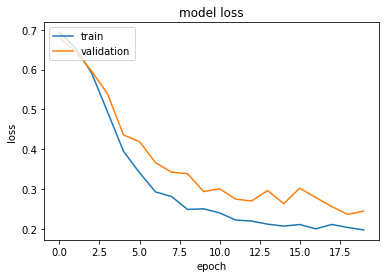

17/17 [==============================] - 1s 72ms/step - loss: 0.2362 - acc: 0.9294

Model CNN with TS #6, Accuracy (hold-out): 0.9293680191040039 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80000, 1)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 80000, 8)          112       
_________________________________________________________________
dropout (Dropout)            (None, 80000, 8)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 40000, 8)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 40000, 16)         1424      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40000

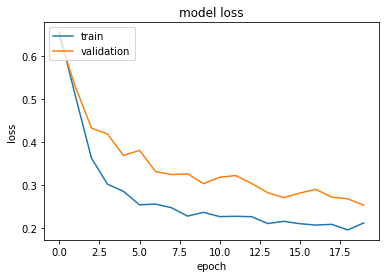

17/17 [==============================] - 2s 91ms/step - loss: 0.2719 - acc: 0.9331

Model CNN with TS #7, Accuracy (hold-out): 0.9330855011940002 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80000, 1)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 80000, 10)         160       
_________________________________________________________________
dropout (Dropout)            (None, 80000, 10)         0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 40000, 10)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 40000, 20)         3020      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40000

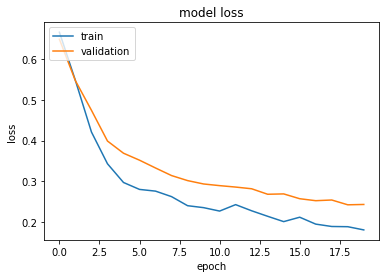

17/17 [==============================] - 2s 110ms/step - loss: 0.2522 - acc: 0.9164

Model CNN with TS #8, Accuracy (hold-out): 0.9163568615913391 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80000, 1)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 80000, 10)         160       
_________________________________________________________________
dropout (Dropout)            (None, 80000, 10)         0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 40000, 10)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 40000, 20)         3020      
_________________________________________________________________
dropout_1 (Dropout)          (None, 4000

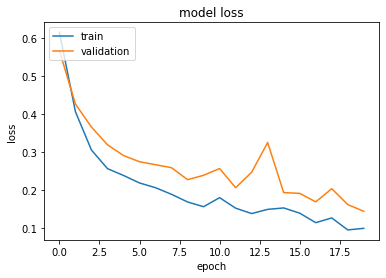

17/17 [==============================] - 2s 142ms/step - loss: 0.1450 - acc: 0.9684

Model CNN with TS #9, Accuracy (hold-out): 0.9684014916419983 


 



In [8]:
random.seed(2)
cnn_ts = []; cnn_ts_acc = []; cnn_ts_mcp = []

for isc in range(n_sc):
    cl = random.choice(hypm_cnn_ts['conv_layers'])
    cf = random.choice(hypm_cnn_ts['ls_conv_filters'])
    ck = random.choice(hypm_cnn_ts['ls_conv_kernels'])
    dn = random.choice(hypm_cnn_ts['ls_dense_neurns'])
    
    model, chkp = conv1d(X_train, conv_layers=cl, ls_conv_filters=cf, 
                                  ls_conv_kernels=ck, ls_dense_neurns=dn,
                                   best_model_record='../model_artifacts/cnn_ts_models/cnn_ts_model_'+str(isc)+'.hdf5')
    cnn_ts.append([cl,cf,ck,dn])
    cnn_ts_mcp.append(chkp)
    model.summary()
    
    %time model_history=model.fit(X_train, y_train, epochs=20, callbacks=[chkp], batch_size=32, validation_data=(X_test,y_test))
    
    ax=plt.plot(model_history.history['loss'])
    ax=plt.plot(model_history.history['val_loss'])
    ax=plt.title('model loss')
    ax=plt.ylabel('loss')
    ax=plt.xlabel('epoch')
    ax=plt.legend(['train', 'validation'], loc='upper left')
    ax=plt.show()
    
    model.load_weights('../model_artifacts/cnn_ts_models/cnn_ts_model_'+str(isc)+'.hdf5')
    loss, acc = model.evaluate(X_test,y_test)
    print("\nModel CNN with TS #{}, Accuracy (hold-out): {} \n".format(isc,acc))
    print('\n \n')
    cnn_ts_acc.append(acc)

In [9]:
cnn_ts_report = []
cnn_ts_report.append(cnn_ts)
cnn_ts_report.append(cnn_ts_acc)

#### Model Selection

In [10]:
cnn_ts_report

[[[2, [8, 16, 24], [13, 11, 8], [32]],
  [2, [10, 20, 30], [15, 15, 15], [16]],
  [2, [8, 16, 24], [15, 15, 15], [32]],
  [3, [10, 20, 30], [15, 15, 15], [16]],
  [2, [10, 20, 30], [15, 15, 15], [32]],
  [3, [10, 20, 30], [13, 11, 8], [16]],
  [2, [8, 16, 24], [13, 11, 8], [16]],
  [3, [8, 16, 24], [13, 11, 8], [32]],
  [2, [10, 20, 30], [15, 15, 15], [32]],
  [3, [10, 20, 30], [15, 15, 15], [16]]],
 [0.9256505370140076,
  0.9163568615913391,
  0.9275093078613281,
  0.9628252983093262,
  0.921933114528656,
  0.9479553699493408,
  0.9293680191040039,
  0.9330855011940002,
  0.9163568615913391,
  0.9684014916419983]]

### Model 2: LSTM with time-series data
__Library:__ Keras <br>
__Model:__   Long-Term-Short-Memory (LSTM) <br>
__Data:__    Time-series data (audio chunks)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline

In [9]:
X_train_lstm = X_train.reshape(len(X_train),-1,160)
X_test_lstm = X_test.reshape(len(X_test),-1,160)

In [10]:
hypm_lstm_ts = {'lstm_layers':[1,2,3],
               'ls_lstm_units':[[128,64,32],[64,32,16]],
               'dense_layers':[1,2],
               'ls_dense_neurns':[[32,16],[16,8]],
               }

n_sc = 10 # number of random scenarios in addition to the Baseline   

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500, 160)]        0         
_________________________________________________________________
lstm (LSTM)                  (None, 500, 128)          147968    
_________________________________________________________________
dense (Dense)                (None, 500, 16)           2064      
_________________________________________________________________
dense_1 (Dense)              (None, 500, 1)            17        
Total params: 150,049
Trainable params: 150,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
40/40 [==============================] - 9s 195ms/step - loss: 0.6735 - acc: 0.5755 - val_loss: 0.6563 - val_acc: 0.5813

Epoch 00001: val_acc improved from -inf to 0.58129, saving model to ./lstm_ts_models/lstm_ts_model_0.hdf5
Epoch 2/20
40/

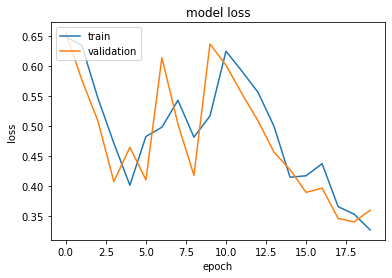

17/17 [==============================] - 1s 63ms/step - loss: 0.3603 - acc: 0.8736

Model LSTM with TS #0, Accuracy (hold-out): 0.8735538721084595 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500, 160)]        0         
_________________________________________________________________
lstm (LSTM)                  (None, 500, 64)           57600     
_________________________________________________________________
dense (Dense)                (None, 500, 32)           2080      
_________________________________________________________________
dense_1 (Dense)              (None, 500, 16)           528       
_________________________________________________________________
dense_2 (Dense)              (None, 500, 1)            17        
Total params: 60,225
Trainable params: 60,225
Non-trainable params: 0
____________________________________

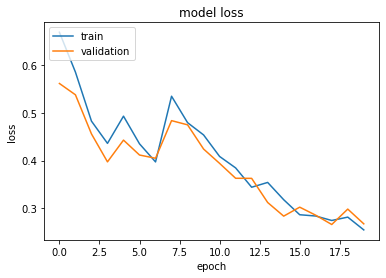

17/17 [==============================] - 1s 30ms/step - loss: 0.2677 - acc: 0.9051

Model LSTM with TS #1, Accuracy (hold-out): 0.9051262736320496 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500, 160)]        0         
_________________________________________________________________
lstm (LSTM)                  (None, 500, 128)          147968    
_________________________________________________________________
lstm_1 (LSTM)                (None, 500, 64)           49408     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 1)  

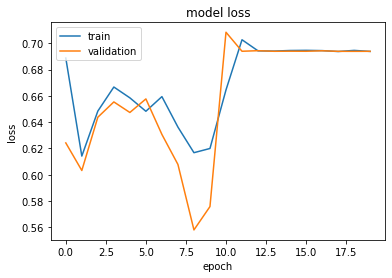

17/17 [==============================] - 2s 109ms/step - loss: 0.5758 - acc: 0.7212

Model LSTM with TS #2, Accuracy (hold-out): 0.7211896181106567 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500, 160)]        0         
_________________________________________________________________
lstm (LSTM)                  (None, 500, 64)           57600     
_________________________________________________________________
lstm_1 (LSTM)                (None, 500, 32)           12416     
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 8) 

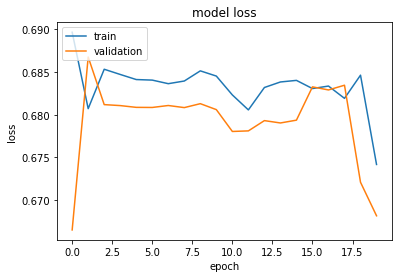

17/17 [==============================] - 1s 65ms/step - loss: 0.6682 - acc: 0.6152

Model LSTM with TS #3, Accuracy (hold-out): 0.6152416467666626 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500, 160)]        0         
_________________________________________________________________
lstm (LSTM)                  (None, 500, 64)           57600     
_________________________________________________________________
lstm_1 (LSTM)                (None, 500, 32)           12416     
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense (Dense)                (None, 32)                544       
_________________________________________________________________
dense_1 (Dense)              (None, 1)  

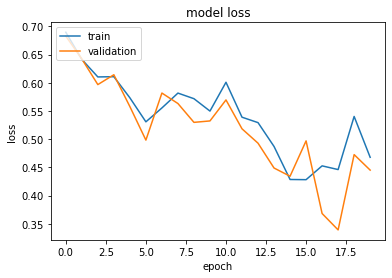

17/17 [==============================] - 1s 64ms/step - loss: 0.3391 - acc: 0.8829

Model LSTM with TS #4, Accuracy (hold-out): 0.8828996419906616 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500, 160)]        0         
_________________________________________________________________
lstm (LSTM)                  (None, 500, 64)           57600     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)  

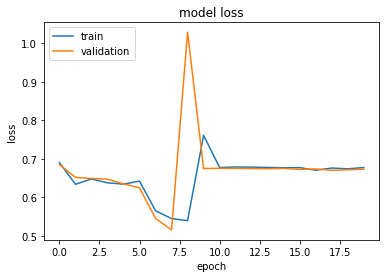

17/17 [==============================] - 1s 52ms/step - loss: 0.5151 - acc: 0.7788

Model LSTM with TS #5, Accuracy (hold-out): 0.7788103818893433 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500, 160)]        0         
_________________________________________________________________
lstm (LSTM)                  (None, 500, 128)          147968    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 199,489
Trainable params: 199,489
Non-trainable params: 0
__________________________________

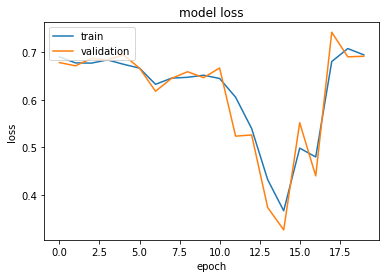

17/17 [==============================] - 2s 90ms/step - loss: 0.3261 - acc: 0.8736

Model LSTM with TS #6, Accuracy (hold-out): 0.8736059665679932 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500, 160)]        0         
_________________________________________________________________
lstm (LSTM)                  (None, 500, 128)          147968    
_________________________________________________________________
dense (Dense)                (None, 500, 16)           2064      
_________________________________________________________________
dense_1 (Dense)              (None, 500, 1)            17        
Total params: 150,049
Trainable params: 150,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
40/40 [==============================] - 9s 199ms/step - loss: 0.6816 - acc: 0.5641 - val

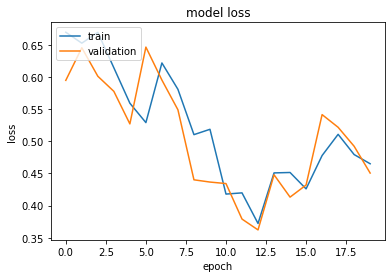

17/17 [==============================] - 1s 64ms/step - loss: 0.3623 - acc: 0.8617

Model LSTM with TS #7, Accuracy (hold-out): 0.8617100715637207 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500, 160)]        0         
_________________________________________________________________
lstm (LSTM)                  (None, 500, 128)          147968    
_________________________________________________________________
dense (Dense)                (None, 500, 32)           4128      
_________________________________________________________________
dense_1 (Dense)              (None, 500, 16)           528       
_________________________________________________________________
dense_2 (Dense)              (None, 500, 1)            17        
Total params: 152,641
Trainable params: 152,641
Non-trainable params: 0
__________________________________

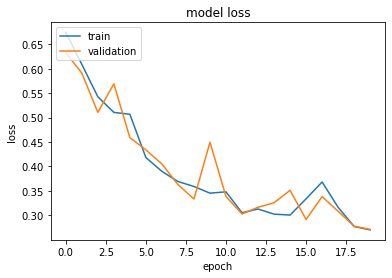

17/17 [==============================] - 1s 65ms/step - loss: 0.2713 - acc: 0.9027

Model LSTM with TS #8, Accuracy (hold-out): 0.9027175307273865 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500, 160)]        0         
_________________________________________________________________
lstm (LSTM)                  (None, 500, 64)           57600     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)  

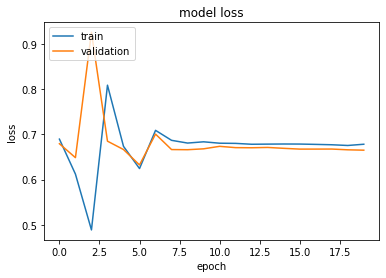

17/17 [==============================] - 1s 52ms/step - loss: 0.6665 - acc: 0.6914

Model LSTM with TS #9, Accuracy (hold-out): 0.6914498209953308 


 



In [14]:
random.seed(2)
lstm_ts = []; lstm_ts_acc = []; lstm_ts_mcp = []

for isc in range(n_sc):
    ll = random.choice(hypm_lstm_ts['lstm_layers'])
    lu = random.choice(hypm_lstm_ts['ls_lstm_units'])
    dl = random.choice(hypm_lstm_ts['dense_layers'])
    dn = random.choice(hypm_lstm_ts['ls_dense_neurns'])
    
    model, chkp = lstm(X_train_lstm, lstm_layers=ll, ls_lstm_units=lu, 
                       dense_layers=dl, ls_dense_neurns=dn,
                        best_model_record='../model_artifacts/lstm_ts_models/lstm_ts_model_'+str(isc)+'.hdf5')
    lstm_ts.append([ll,lu,dl,dn])
    lstm_ts_mcp.append(chkp)
    model.summary()
    
    %time model_history=model.fit(X_train_lstm, y_train, epochs=20, callbacks=[chkp], batch_size=32, validation_data=(X_test_lstm,y_test))
    
    ax=plt.plot(model_history.history['loss'])
    ax=plt.plot(model_history.history['val_loss'])
    ax=plt.title('model loss')
    ax=plt.ylabel('loss')
    ax=plt.xlabel('epoch')
    ax=plt.legend(['train', 'validation'], loc='upper left')
    ax=plt.show()
    
    model.load_weights('../model_artifacts/lstm_ts_models/lstm_ts_model_'+str(isc)+'.hdf5')
    loss, acc = model.evaluate(X_test_lstm,y_test)
    print("\nModel LSTM with TS #{}, Accuracy (hold-out): {} \n".format(isc,acc))
    print('\n \n')
    lstm_ts_acc.append(acc)

In [15]:
lstm_ts_report = []
lstm_ts_report.append(lstm_ts)
lstm_ts_report.append(lstm_ts_acc)

#### Model Selection

In [16]:
lstm_ts_report

[[[1, [128, 64, 32], 1, [16, 8]],
  [1, [64, 32, 16], 2, [32, 16]],
  [3, [128, 64, 32], 1, [16, 8]],
  [3, [64, 32, 16], 2, [16, 8]],
  [3, [64, 32, 16], 1, [32, 16]],
  [2, [64, 32, 16], 2, [16, 8]],
  [2, [128, 64, 32], 1, [32, 16]],
  [1, [128, 64, 32], 1, [16, 8]],
  [1, [128, 64, 32], 2, [32, 16]],
  [2, [64, 32, 16], 2, [16, 8]]],
 [0.8735538721084595,
  0.9051262736320496,
  0.7211896181106567,
  0.6152416467666626,
  0.8828996419906616,
  0.7788103818893433,
  0.8736059665679932,
  0.8617100715637207,
  0.9027175307273865,
  0.6914498209953308]]

### Model 3: CNN with Spectrogram data
__Library:__ Keras <br>
__Model:__   Convolutional Neural Network (CNN) with 1D layers, filters <br>
__Data:__    Spectrogram

In [11]:
X_train_spec = extract_spectrogram_features(X_train_listen,r_sample)
X_test_spec  = extract_spectrogram_features(X_test_listen,r_sample)

In [11]:
hypm_cnn_spec = {'conv_layers':[1,2,3],
               'ls_conv_filters':[[8,16,24],[10,20,30]],
               'ls_conv_kernels':[[13,11,8],[15,15,15]],
               'ls_dense_neurns':[[16],[32]]}

n_sc = 10 # number of random scenarios in addition to the Baseline 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 357, 129)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 357, 8)            13424     
_________________________________________________________________
dropout (Dropout)            (None, 357, 8)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 178, 8)            0         
_________________________________________________________________
global_max_pooling1d (Global (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 32)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33    

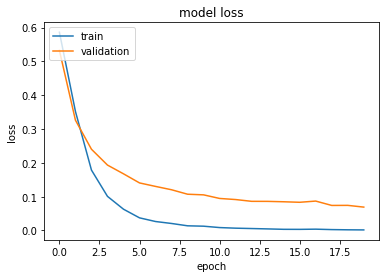

17/17 [==============================] - 0s 3ms/step - loss: 0.0915 - acc: 0.9777

Model CNN with Spectrogram #0, Accuracy (hold-out): 0.9776951670646667 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 357, 129)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 357, 10)           19360     
_________________________________________________________________
dropout (Dropout)            (None, 357, 10)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 178, 10)           0         
_________________________________________________________________
global_max_pooling1d (Global (None, 10)                0         
_________________________________________________________________
dense (Dense)                (Non

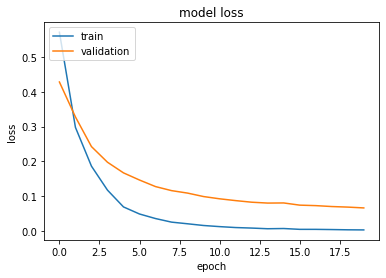

17/17 [==============================] - 0s 3ms/step - loss: 0.0798 - acc: 0.9870

Model CNN with Spectrogram #1, Accuracy (hold-out): 0.9869888424873352 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 357, 129)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 357, 8)            13424     
_________________________________________________________________
dropout (Dropout)            (None, 357, 8)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 178, 8)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 178, 16)           1424      
_________________________________________________________________
dropout_1 (Dropout)          (Non

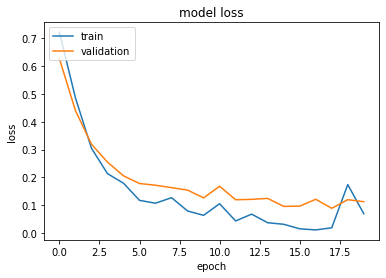

17/17 [==============================] - 0s 4ms/step - loss: 0.0888 - acc: 0.9740

Model CNN with Spectrogram #2, Accuracy (hold-out): 0.9739776849746704 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 357, 129)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 357, 10)           19360     
_________________________________________________________________
dropout (Dropout)            (None, 357, 10)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 178, 10)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 178, 20)           3020      
_________________________________________________________________
dropout_1 (Dropout)          (Non

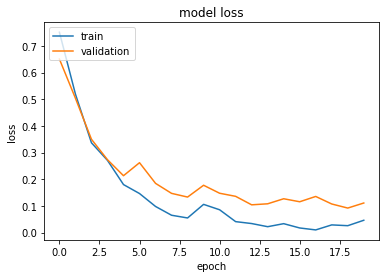

17/17 [==============================] - 0s 4ms/step - loss: 0.1040 - acc: 0.9684

Model CNN with Spectrogram #3, Accuracy (hold-out): 0.9684014916419983 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 357, 129)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 357, 10)           16780     
_________________________________________________________________
dropout (Dropout)            (None, 357, 10)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 178, 10)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 178, 20)           2220      
_________________________________________________________________
dropout_1 (Dropout)          (Non

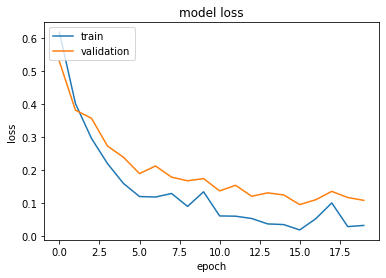

17/17 [==============================] - 0s 4ms/step - loss: 0.1250 - acc: 0.9665

Model CNN with Spectrogram #4, Accuracy (hold-out): 0.9665427803993225 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 357, 129)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 357, 10)           19360     
_________________________________________________________________
dropout (Dropout)            (None, 357, 10)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 178, 10)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 178, 20)           3020      
_________________________________________________________________
dropout_1 (Dropout)          (Non

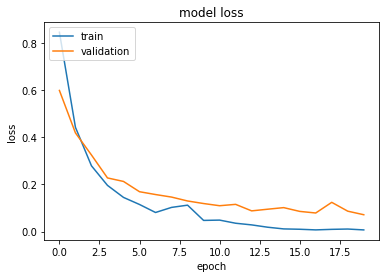

17/17 [==============================] - 0s 4ms/step - loss: 0.0715 - acc: 0.9796

Model CNN with Spectrogram #5, Accuracy (hold-out): 0.9795538783073425 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 357, 129)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 357, 8)            13424     
_________________________________________________________________
dropout (Dropout)            (None, 357, 8)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 178, 8)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 178, 16)           1424      
_________________________________________________________________
dropout_1 (Dropout)          (Non

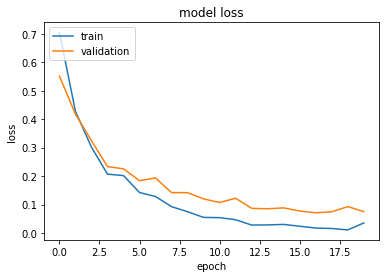

17/17 [==============================] - 0s 3ms/step - loss: 0.0773 - acc: 0.9796

Model CNN with Spectrogram #6, Accuracy (hold-out): 0.9795538783073425 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 357, 129)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 357, 8)            13424     
_________________________________________________________________
dropout (Dropout)            (None, 357, 8)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 178, 8)            0         
_________________________________________________________________
global_max_pooling1d (Global (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (Non

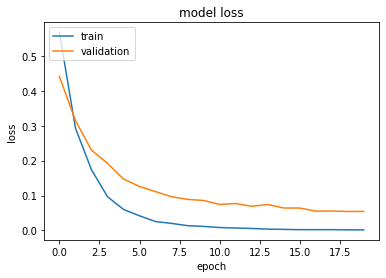

17/17 [==============================] - 0s 3ms/step - loss: 0.0557 - acc: 0.9851

Model CNN with Spectrogram #7, Accuracy (hold-out): 0.9851301312446594 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 357, 129)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 357, 8)            15488     
_________________________________________________________________
dropout (Dropout)            (None, 357, 8)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 178, 8)            0         
_________________________________________________________________
global_max_pooling1d (Global (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (Non

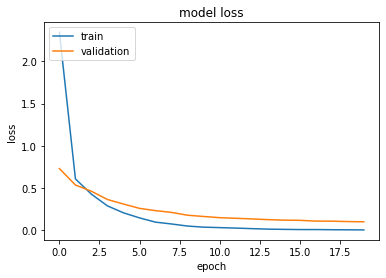

17/17 [==============================] - 0s 4ms/step - loss: 0.1100 - acc: 0.9628

Model CNN with Spectrogram #8, Accuracy (hold-out): 0.9628252983093262 


 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 357, 129)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 357, 10)           19360     
_________________________________________________________________
dropout (Dropout)            (None, 357, 10)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 178, 10)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 178, 20)           3020      
_________________________________________________________________
dropout_1 (Dropout)          (Non

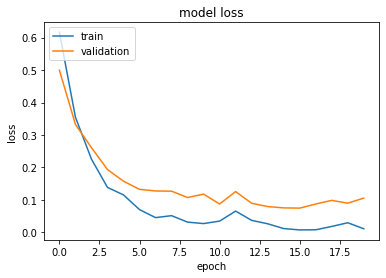

17/17 [==============================] - 0s 4ms/step - loss: 0.0873 - acc: 0.9758

Model CNN with Spectrogram #9, Accuracy (hold-out): 0.975836455821991 


 



In [19]:
random.seed(2)
cnn_spec = []; cnn_spec_acc = []; cnn_spec_mcp = []

for isc in range(n_sc):
    cl = random.choice(hypm_cnn_spec['conv_layers'])
    cf = random.choice(hypm_cnn_spec['ls_conv_filters'])
    ck = random.choice(hypm_cnn_spec['ls_conv_kernels'])
    dn = random.choice(hypm_cnn_spec['ls_dense_neurns'])
    
    model, chkp = conv1d(X_train_spec, conv_layers=cl, ls_conv_filters=cf, 
                                  ls_conv_kernels=ck, ls_dense_neurns=dn,
                                   best_model_record='../model_artifacts/cnn_spec_models/cnn_spec_model_'+str(isc)+'.hdf5')
    cnn_spec.append([cl,cf,ck,dn])
    cnn_spec_mcp.append(chkp)
    model.summary()
    
    %time model_history=model.fit(X_train_spec, y_train, epochs=20, callbacks=[chkp], batch_size=32, validation_data=(X_test_spec,y_test))
    
    ax=plt.plot(model_history.history['loss'])
    ax=plt.plot(model_history.history['val_loss'])
    ax=plt.title('model loss')
    ax=plt.ylabel('loss')
    ax=plt.xlabel('epoch')
    ax=plt.legend(['train', 'validation'], loc='upper left')
    ax=plt.show()
    
    model.load_weights('../model_artifacts/cnn_spec_models/cnn_spec_model_'+str(isc)+'.hdf5')
    loss, acc = model.evaluate(X_test_spec,y_test)
    print("\nModel CNN with Spectrogram #{}, Accuracy (hold-out): {} \n".format(isc,acc))
    print('\n \n')
    cnn_spec_acc.append(acc)

In [20]:
cnn_spec_report = []
cnn_spec_report.append(cnn_spec)
cnn_spec_report.append(cnn_spec_acc)

#### Model Selection

In [21]:
cnn_spec_report

[[[1, [8, 16, 24], [13, 11, 8], [32]],
  [1, [10, 20, 30], [15, 15, 15], [16]],
  [3, [8, 16, 24], [13, 11, 8], [32]],
  [3, [10, 20, 30], [15, 15, 15], [32]],
  [3, [10, 20, 30], [13, 11, 8], [16]],
  [2, [10, 20, 30], [15, 15, 15], [32]],
  [2, [8, 16, 24], [13, 11, 8], [16]],
  [1, [8, 16, 24], [13, 11, 8], [32]],
  [1, [8, 16, 24], [15, 15, 15], [16]],
  [2, [10, 20, 30], [15, 15, 15], [32]]],
 [0.9776951670646667,
  0.9869888424873352,
  0.9739776849746704,
  0.9684014916419983,
  0.9665427803993225,
  0.9795538783073425,
  0.9795538783073425,
  0.9851301312446594,
  0.9628252983093262,
  0.975836455821991]]

### Models Performance Summary

#### Load Models

In [12]:
in_cnn_ts = '../model_artifacts/cnn_ts_models/cnn_ts_model_9.hdf5'
in_lstm_ts = '../model_artifacts/lstm_ts_models/lstm_ts_model_1.hdf5'
in_cnn_spec = '../model_artifacts/cnn_spec_models/cnn_spec_model_1.hdf5'

In [13]:
cnn_ts   = load_model(in_cnn_ts, compile=True)
lstm_ts  = load_model(in_lstm_ts, compile=True)
cnn_spec = load_model(in_cnn_spec, compile=True)

#### Model Configuration

In [14]:
print('Final CNN model with Time Series Data:')
cnn_ts.summary()
print('Final LSTM model with Time Series Data:')
lstm_ts.summary()
print('Final CNN model with Spectrograms:')
cnn_spec.summary()

Final CNN model with Time Series Data:
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80000, 1)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 80000, 10)         160       
_________________________________________________________________
dropout (Dropout)            (None, 80000, 10)         0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 40000, 10)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 40000, 20)         3020      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40000, 20)         0         
_________________________________________________________________
max_pooling1d_1 (MaxPo

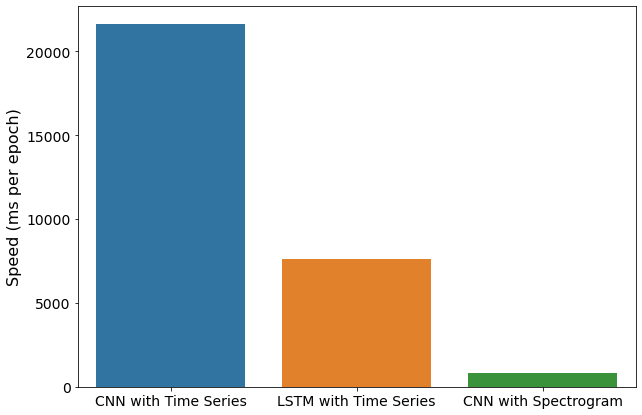

In [22]:
train_speed={'CNN with Time Series':21600,
            'LSTM with Time Series': 7600,
            'CNN with Spectrogram': 800
           }
df_train_speed=pd.DataFrame.from_dict(train_speed, orient='index',columns=['Train Speed (ms per epoch)'])

fig, ax = plt.subplots(1,1,figsize=(10,7))
ax      = sns.barplot(ax=ax, data=df_train_speed,x=df_train_speed.index.tolist(),y=df_train_speed.iloc[:,0])
ax.tick_params(labelsize=14)
ax      =ax.set_ylabel("Speed (ms per epoch)",fontsize=16)

#### Prediction Speed

In [15]:
print('\nFinal CNN model with Time Series Data:')
%time prob = cnn_ts.predict(X_test[0].reshape(1,-1,1))
print('\nFinal LSTM model with Time Series Data:')
%time prob = lstm_ts.predict(X_test_lstm[0].reshape(1,-1,X_test_lstm.shape[2]))
print('\nFinal CNN model with Spectrograms:')
%time prob = cnn_spec.predict(X_test_spec[0].reshape(1,-1,X_test_spec.shape[2]))


Final CNN model with Time Series Data:
CPU times: user 170 ms, sys: 9.09 ms, total: 179 ms
Wall time: 175 ms

Final LSTM model with Time Series Data:
CPU times: user 285 ms, sys: 10.9 ms, total: 296 ms
Wall time: 277 ms

Final CNN model with Spectrograms:
CPU times: user 45.1 ms, sys: 0 ns, total: 45.1 ms
Wall time: 42.4 ms


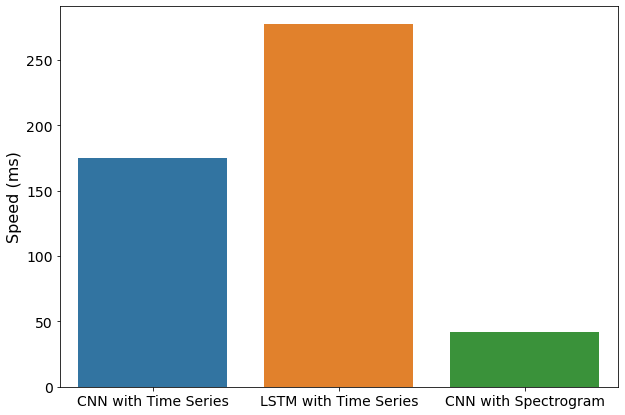

In [138]:
pred_speed={'CNN with Time Series':175,
            'LSTM with Time Series': 277,
            'CNN with Spectrogram': 42
           }
df_pred_speed=pd.DataFrame.from_dict(pred_speed, orient='index',columns=['Speed (ms)'])

fig, ax = plt.subplots(1,1,figsize=(10,7))
ax      = sns.barplot(ax=ax, data=df_pred_speed,x=df_pred_speed.index.tolist(),y=df_pred_speed.iloc[:,0])
ax.tick_params(labelsize=14)
ax      =ax.set_ylabel("Speed (ms)",fontsize=16)

#### Preidction Accuracy

In [16]:
loss, acc = cnn_ts.evaluate(X_test,y_test)
loss, acc = lstm_ts.evaluate(X_test_lstm,y_test)
loss, acc = cnn_spec.evaluate(X_test_spec,y_test)

17/17 [==============================] - 0s 4ms/step - loss: 0.0798 - acc: 0.9870


(0.8, 1.0)

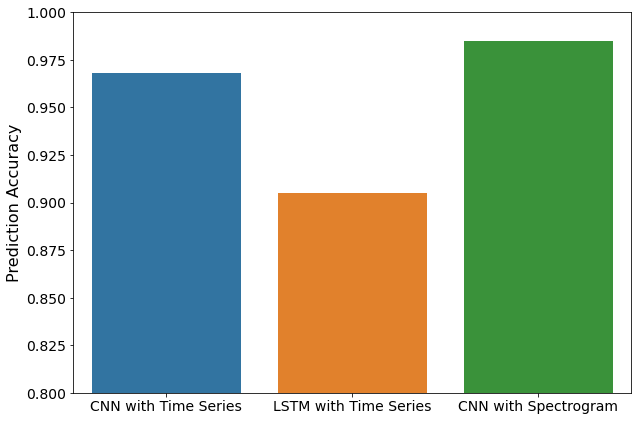

In [24]:
pred_accu={'CNN with Time Series': 0.968,
               'LSTM with Time Series': 0.905,
               'CNN with Spectrogram': 0.985
              }
df_pred_accu=pd.DataFrame.from_dict(pred_accu, orient='index',columns=['Prediction Accuracy'])

fig, ax = plt.subplots(1,1,figsize=(10,7))
ax      = sns.barplot(ax=ax, data=df_pred_accu,x=df_pred_accu.index.tolist(),y=df_pred_accu.iloc[:,0])
ax.tick_params(labelsize=14)
ax      =ax.set_ylabel("Prediction Accuracy",fontsize=16)
plt.ylim(0.8, 1)

### Prediction on the Validation Set

In [18]:
chunk_duration  = 5 #in seconds

In [19]:
validation, _ = librosa.load(in_validation,sr = r_sample)
valid_chunk   = chunk_data(validation,chunk_duration,r_sample)

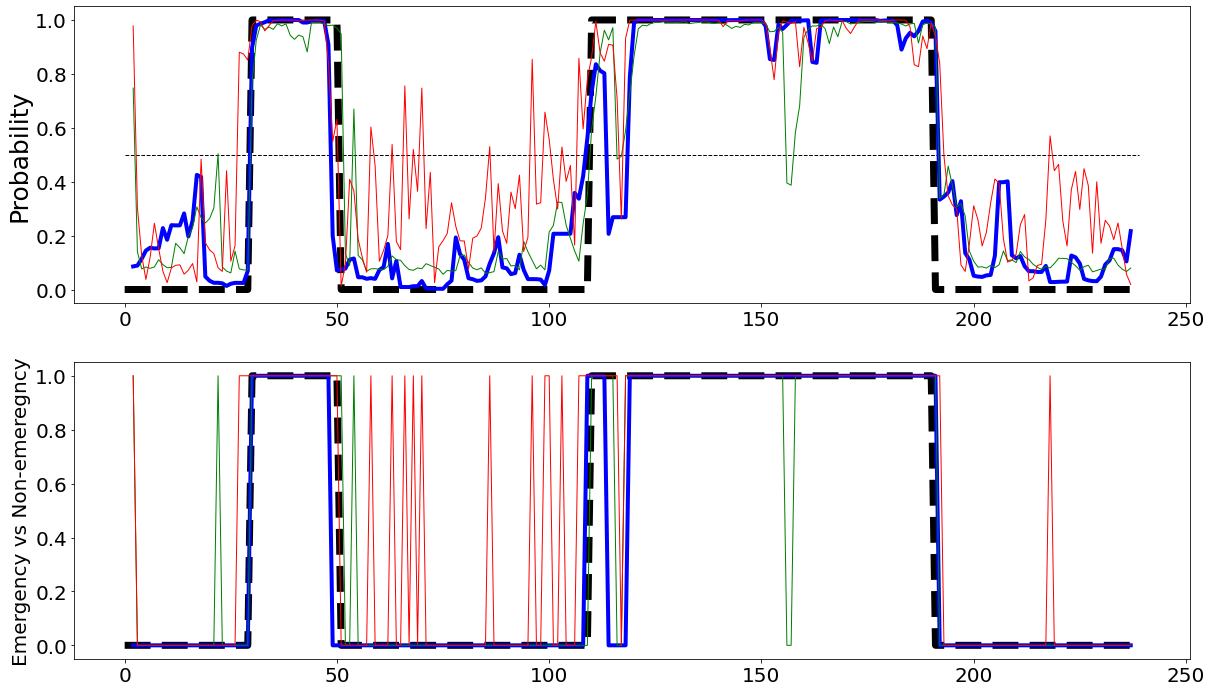

In [116]:
truth=np.array([1 if ((i>=30 and i<=50) or (i>=110 and i<=190)) else 0 for i in range(240)])
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20,12))
ax      = sns.lineplot(ax=ax1, data=truth, x=[i for i in range(240)],y=truth,linewidth = 7,color='black')
ax      = sns.lineplot(ax=ax1, data=truth, x=[i for i in range(240)],y=[0.5 for i in range(240)],linewidth = 1,color='black')
ax      = sns.lineplot(ax=ax2, data=truth, x=[i for i in range(240)],y=truth,linewidth = 7,color='black')
ax1.lines[0].set_linestyle("--")
ax1.lines[1].set_linestyle("--")
ax2.lines[0].set_linestyle("--")
ax      =ax1.set_ylabel("Probability",fontsize=25)
ax      =ax2.set_ylabel("Emergency vs Non-emeregncy",fontsize=20)
ax1.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)

cnn_ts_prob=[] ; cnn_ts_catg=[] ; lstm_ts_prob=[] ; lstm_ts_catg=[] ; cnn_sp_prob=[]; cnn_sp_catg=[]

for j in range(len(valid_chunk)):
    X_val=valid_chunk[j]
    prob_cnn_ts = cnn_ts.predict(X_val.reshape(1,-1,1))
    cnn_ts_prob.append(prob_cnn_ts.tolist()[0][0])
    if prob_cnn_ts.tolist()[0][0] >= 0.5:
        cnn_ts_catg.append(1)
    else:
        cnn_ts_catg.append(0)

    X_val_lstm = X_val.reshape(1, -1, 160)
    prob_lstm_ts = lstm_ts.predict(X_val_lstm)
    lstm_ts_prob.append(np.mean(prob_lstm_ts[0]))
    if np.mean(prob_lstm_ts[0]) >= 0.5:
        lstm_ts_catg.append(1)
    else:
        lstm_ts_catg.append(0)   
        
    X_val_cnn_spec = extract_spectrogram_features(X_val.reshape(1,-1),r_sample)
    prob_cnn_sp = cnn_spec.predict(X_val_cnn_spec)
    cnn_sp_prob.append(prob_cnn_sp.tolist()[0][0])
    if prob_cnn_sp.tolist()[0][0] >= 0.5:
        cnn_sp_catg.append(1)
    else:
        cnn_sp_catg.append(0)


ax = sns.lineplot(ax=ax1, data=cnn_ts_prob, x=[i for i in range(2,238)],y=cnn_ts_prob,linewidth = 4,color='blue')
ax = sns.lineplot(ax=ax2, data=cnn_ts_catg, x=[i for i in range(2,238)],y=cnn_ts_catg,linewidth = 4,color='blue')

ax = sns.lineplot(ax=ax1, data=lstm_ts_prob, x=[i for i in range(2,238)],y=lstm_ts_prob,linewidth = 1,color='green')
ax = sns.lineplot(ax=ax2, data=lstm_ts_catg, x=[i for i in range(2,238)],y=lstm_ts_catg,linewidth = 1,color='green')

ax = sns.lineplot(ax=ax1, data=cnn_sp_prob, x=[i for i in range(2,238)],y=cnn_sp_prob,linewidth = 1,color='red')
ax = sns.lineplot(ax=ax2, data=cnn_sp_catg, x=[i for i in range(2,238)],y=cnn_sp_catg,linewidth = 1,color='red')